### Prediction of fuel consumption using Multiple Linear Regression

#### In this project, we will be predicting the co2 emission of the vehicles using multiple linear regression, that is multiple features will be used to train the model and predict the outcome, which in our case is co2 emission.

### Importing the libraries and the data file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('fuel.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Some of the features are selected for predicting the co2 emission.

In [3]:
df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


### Creating training and testing dataset

Now we will be creating the training and the testing data set for the model.

In [7]:
mask = np.random.rand(len(df)) < 0.8
train = df[mask]
train.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
2,1.5,4,6.0,5.8,5.9,136
4,3.5,6,12.1,8.7,10.6,244


In [9]:
test = df[~mask]
test.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
1,2.4,4,11.2,7.7,9.6,221
3,3.5,6,12.7,9.1,11.1,255
7,3.7,6,12.8,9.0,11.1,255


### Model creation

Now multiple linear regression model is created using multiple features in order to predict the target variable which is co2 emissions.

In [10]:
from sklearn.linear_model import LinearRegression
regr1 = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

In [12]:
#fitting the training data set into the model for model learning

regr1.fit(train_x, train_y)
print('Coefficient of the Multiple Regression line is:   ', regr1.coef_)
print('Intercept of the Multiple Regression line is:   ', regr1.intercept_)

Coefficient of the Multiple Regression line is:    [[10.98535574  6.67116702  8.32131594]]
Intercept of the Multiple Regression line is:    [70.00640306]


In [13]:
#predicting the target variable now

test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
yhat = regr1.predict(test_x)
yhat

array([[216.25466341],
       [254.16286267],
       [257.19206541],
       [262.18485497],
       [208.53199474],
       [214.3569159 ],
       [218.51757387],
       [224.53836858],
       [289.64050646],
       [227.03476336],
       [218.51757387],
       [201.0428104 ],
       [250.33444799],
       [252.83084277],
       [205.20346837],
       [382.39886048],
       [203.53920518],
       [181.90378374],
       [205.20346837],
       [206.86773155],
       [240.34886886],
       [237.85247408],
       [203.53920518],
       [206.86773155],
       [247.00592161],
       [296.53104353],
       [247.00592161],
       [219.54557902],
       [230.36328974],
       [296.53104353],
       [208.53199474],
       [271.07189853],
       [214.3569159 ],
       [219.34970546],
       [259.42205621],
       [249.5023164 ],
       [355.41486876],
       [330.45092095],
       [266.07910896],
       [187.79454421],
       [181.96962305],
       [306.02142546],
       [377.14904916],
       [333

Let's look into the fitted line plot

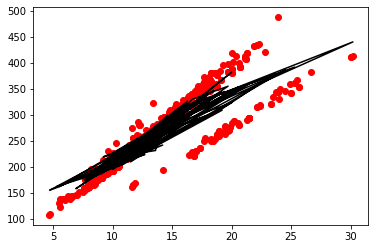

In [47]:
plt.scatter(train['FUELCONSUMPTION_CITY'], train['CO2EMISSIONS'], color='red')
plt.plot(test_x[:,2:], yhat, color='black');

The black line is the prediction values for the corresponding test x values and the line is showing a good fit.

### Now the accuracy is checked for the model

In [48]:
from sklearn.metrics import r2_score
print('R2 Score is:   ', r2_score(test_y, yhat))

R2 Score is:    0.8737060391792792


In [49]:
print("Residual sum of squares: %.2f"%np.mean((yhat - test_y) ** 2))

Residual sum of squares: 491.89


In [50]:
print('Variance score: %.2f'%regr1.score(test_x, test_y))

Variance score: 0.87


From the above scores it can be seen that the model prediction is quite accurate. R2 score and Variance value 1 means good accuracy and our model accuracy value is near to 1, which indicates good prediction.

#### Now let's make the prediction using other features.

In [52]:
regr2 = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr2.fit(train_x, train_y)
print('Coefficient of the Multiple Regression line is:   ', regr2.coef_)
print('Intercept of the Multiple Regression line is:   ', regr2.intercept_)

Coefficient of the Multiple Regression line is:    [[11.17847259  9.91516567 10.44499508]]
Intercept of the Multiple Regression line is:    [62.26488292]


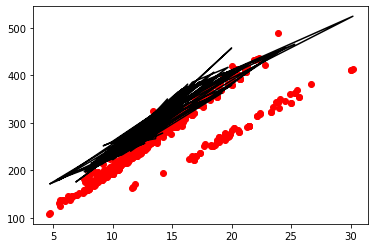

In [53]:
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
yhat = regr2.predict(test_x)

plt.scatter(train['FUELCONSUMPTION_CITY'], train['CO2EMISSIONS'], color='red')
plt.plot(test_x[:,2:], yhat, color='black');

In [54]:
print('R2 Score is:   ', r2_score(test_y, yhat))
print("Residual sum of squares: %.2f" % np.mean((yhat - test_y) ** 2))
print('Variance score: %.2f' % regr2.score(test_x, test_y))

R2 Score is:    0.49413884805628294
Residual sum of squares: 1970.22
Variance score: 0.49


From the above scores it can be seen that the model prediction is not much accurate. R2 score and Variance value 1 means good accuracy and our model accuracy value is near to 0.5 which indicates moderate prediction. Thus, selecting the feature of FUELCONSUMPTION_CITY is better than FUELCONSUMPTION_HWY, as the prediction result in case of the former is more accurate.